# PROBLEM STATEMENT 

# 1-- Pakages and Data: 

In [1]:
# import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder, StandardScaler
import xgboost as xgb
import warnings
import math as m
warnings.filterwarnings('ignore')

In [2]:
# data
training=pd.read_csv('Train.csv')
testing=pd.read_csv('Test.csv')

In [3]:
# top five rows of training data
training.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# top five rows of testing data
testing.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# HYPOTHESIS GENERATION
It is the information about the features of the dataset.

# 2-- Data Structures and content

In [5]:
# shape of data:
print('Training Data Shape',training.shape)
print('Testing Data Shape: ',testing.shape)

Training Data Shape (8523, 12)
Testing Data Shape:  (5681, 11)


In [6]:
# information about training data
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# statical measurement of dataset
training.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
# dataset columns :
print(training.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


# 3-- EDA(Exploratory Data Analysis Outliers + Graphs)

In [9]:
# null values checking :
training.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# removing missing values from Item Weight and Outlet Size
training['Item_Weight'].replace(np.nan,training['Item_Weight'].mean(),inplace=True)
training['Outlet_Size']=training['Outlet_Size'].fillna(training['Outlet_Size'].mode()[0])

In [11]:
training.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

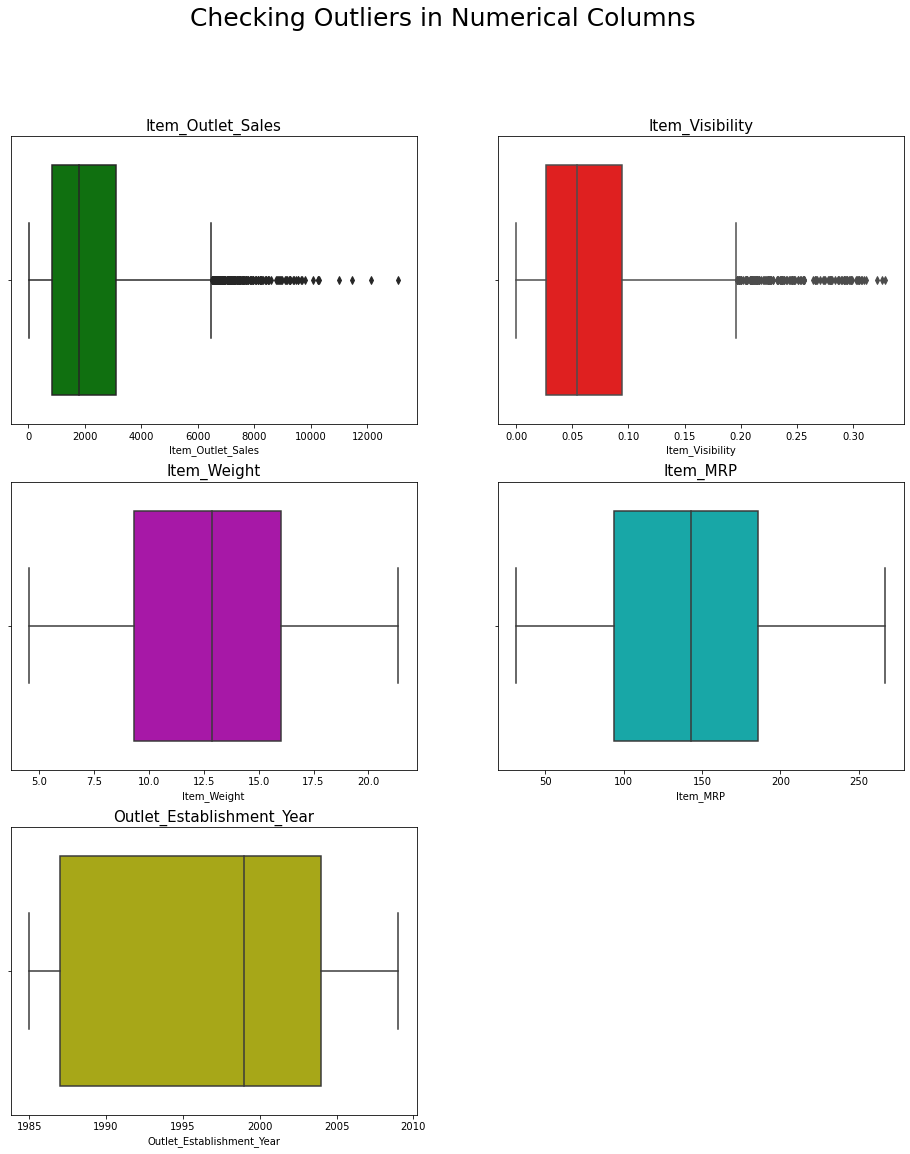

In [12]:
# ploting the boxplot and checking outliers
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
plt.title('Item_Outlet_Sales',fontsize=15)
sns.boxplot(training['Item_Outlet_Sales'],color='g')
plt.subplot(3, 2, 2)
plt.title('Item_Visibility',fontsize=15)
sns.boxplot(training['Item_Visibility'],color='r')
plt.subplot(3,2,3)
plt.title('Item_Weight',fontsize=15)
sns.boxplot(training['Item_Weight'],color='m')
plt.subplot(3,2,4)
plt.title('Item_MRP',fontsize=15)
sns.boxplot(training['Item_MRP'],color='c')
plt.subplot(3,2,5)
plt.title('Outlet_Establishment_Year',fontsize=15)
sns.boxplot(training['Outlet_Establishment_Year'],color='y')
plt.suptitle('Checking Outliers in Numerical Columns',fontsize=25)
plt.show()

As Above we found Outliers in Item Outlet Sales and Item Visibility column, So we remove outliers from these columns

In [13]:
# remove outliers
def remove_outlier(training, col_name):
    q1 = training[col_name].quantile(0.25)
    q3 = training[col_name].quantile(0.75)
    #Interquartile range
    IQR = q3-q1
    lower_bound  = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    filter_outlier= training.loc[(training[col_name] > lower_bound) & (training[col_name] < upper_bound)]
    return filter_outlier

In [14]:
# remove outlier from Item_Outlet_Sales column
IOS_outlier=remove_outlier(training,'Item_Outlet_Sales')
IOS_outlier.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


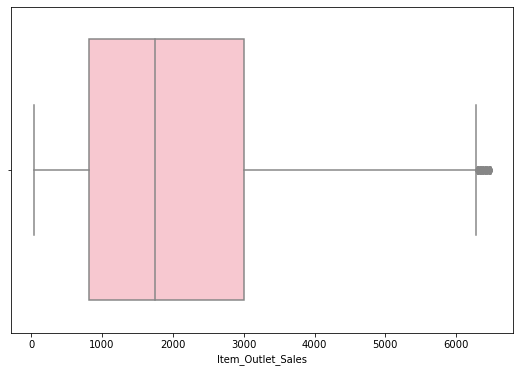

In [15]:
# plot after the removal of outliers from Item_Outlet_Sales:
plt.figure(figsize=(9,6))
sns.boxplot('Item_Outlet_Sales', data=IOS_outlier,color='pink')
plt.show()

In [16]:
# remove outlier from Item_Visibility column:
IV_outlier=remove_outlier(training,'Item_Visibility')

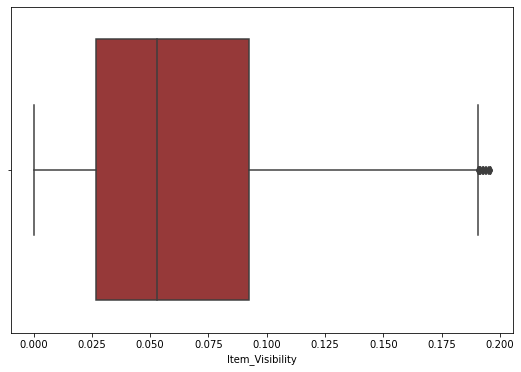

In [17]:
# plot after the removal of outliers from Item_Visibility:
plt.figure(figsize=(9,6))
sns.boxplot('Item_Visibility', data=IV_outlier,color='brown')
plt.show()

# 4 -- Univariate Analysis by visualize graphs

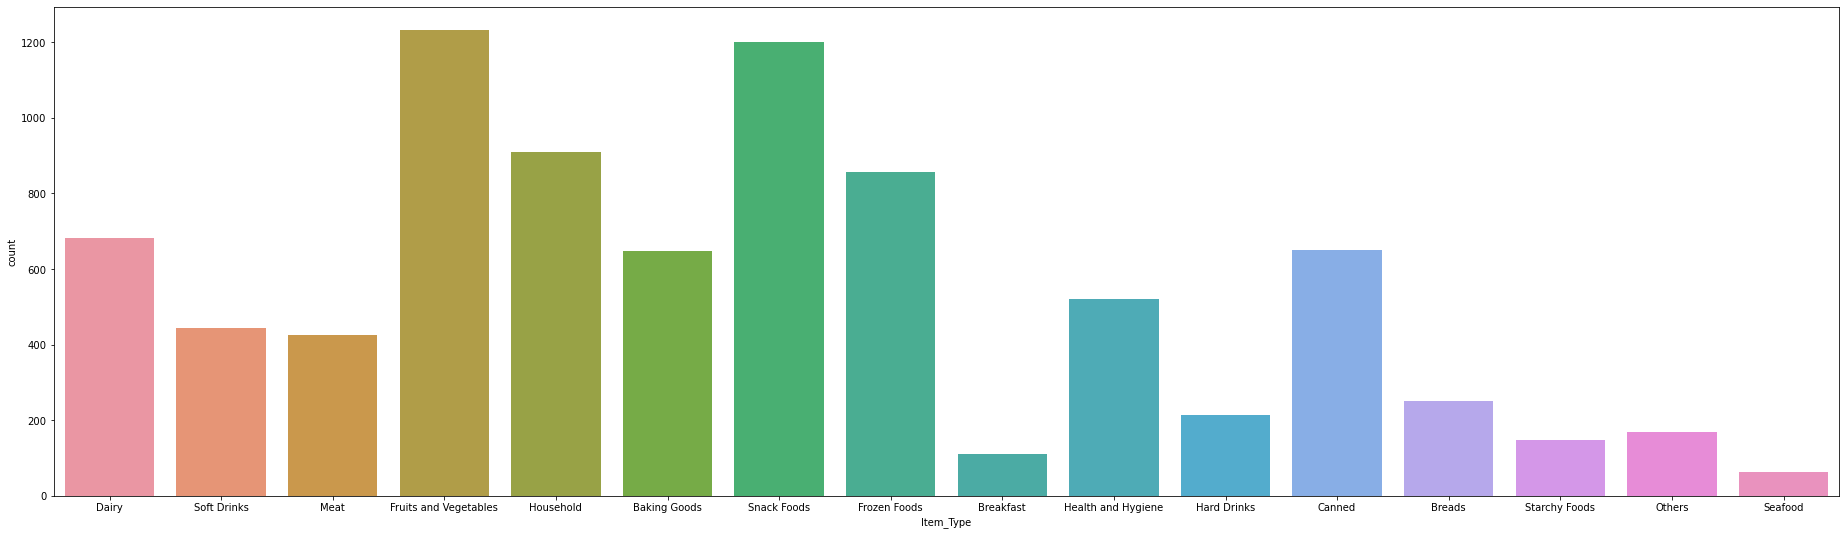

In [18]:
plt.figure(figsize=(32,9))
sns.countplot(training['Item_Type'])
plt.show()

In above graph the ratio of Quantity of Fruits and vegetables item type is greater than others

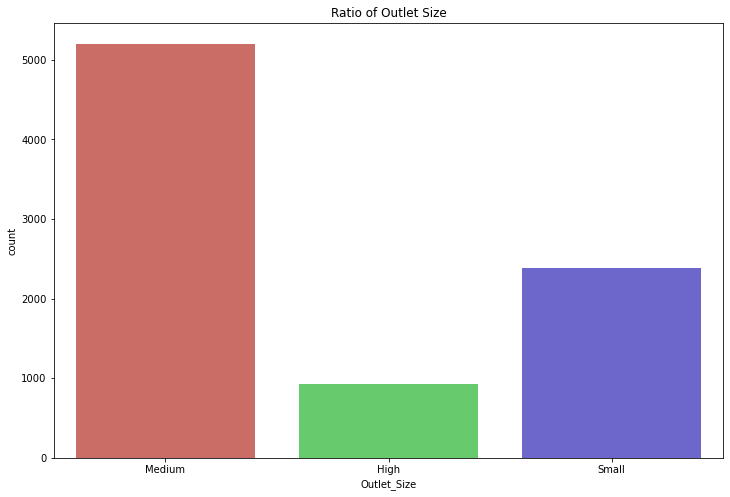

In [19]:
plt.figure(figsize=(12,8))
plt.title('Ratio of Outlet Size')
sns.countplot(training['Outlet_Size'],palette="hls")
plt.show()

In above graph the ratio of medium is greater than others

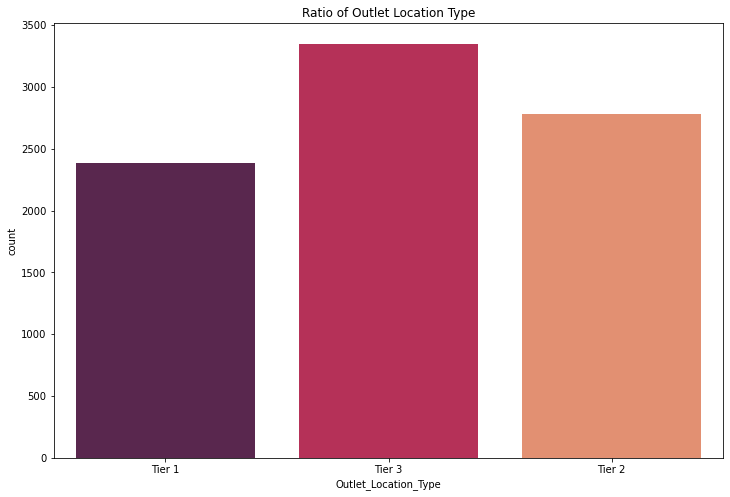

In [20]:
plt.figure(figsize=(12,8))
plt.title('Ratio of Outlet Location Type')
sns.countplot(training['Outlet_Location_Type'],palette='rocket')
plt.show()

In the graph above the Tier 3 outlet type has majority ratio than others

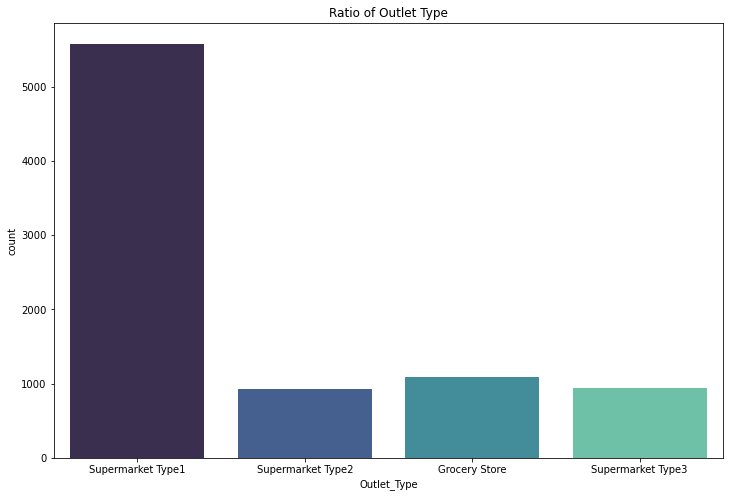

In [21]:
plt.figure(figsize=(12,8))
plt.title('Ratio of Outlet Type')
sns.countplot(training['Outlet_Type'],palette='mako')
plt.show()

In above graph the supermarket type 1 has the greatest majortiy

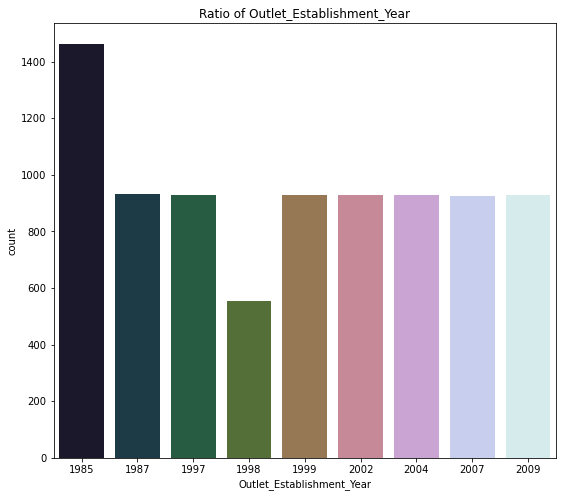

In [22]:
plt.figure(figsize=(9,8))
plt.title('Ratio of Outlet_Establishment_Year')
sns.countplot(training['Outlet_Establishment_Year'],palette='cubehelix')
plt.show()

Above in graph the year 1985 is the highest establishment year and from 1987 to 2009 all years are equally established except 1998.

# 5-- Bivariate Analysis by graphical visualization

[]

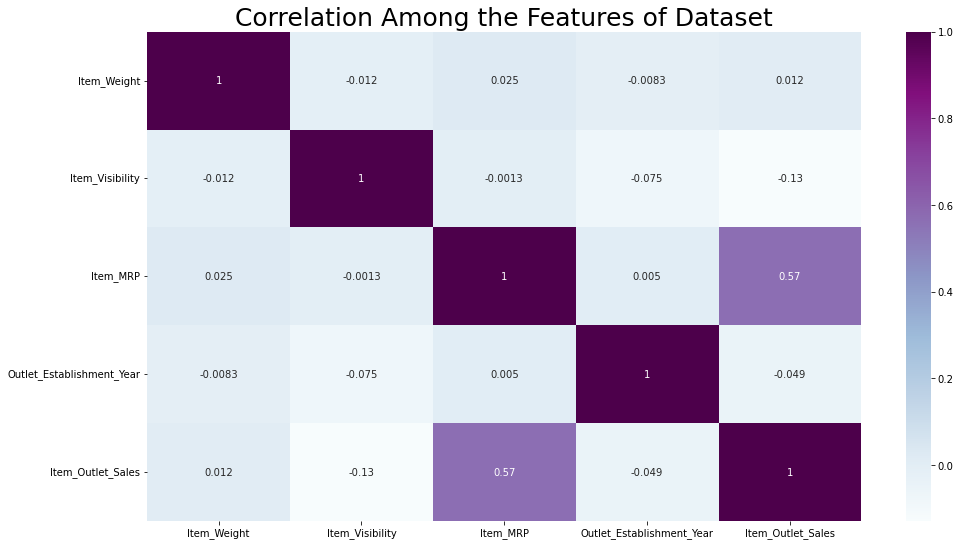

In [23]:
# correlation among all the perameters  of the dataset:
plt.figure(figsize=(16,9))
correlation=training.corr()
plt.title('Correlation Among the Features of Dataset',fontsize=25)
sns.heatmap(correlation, annot=True, cmap='BuPu')
plt.plot()

In the graph above some of features and negativey correlated to each while others are positively.

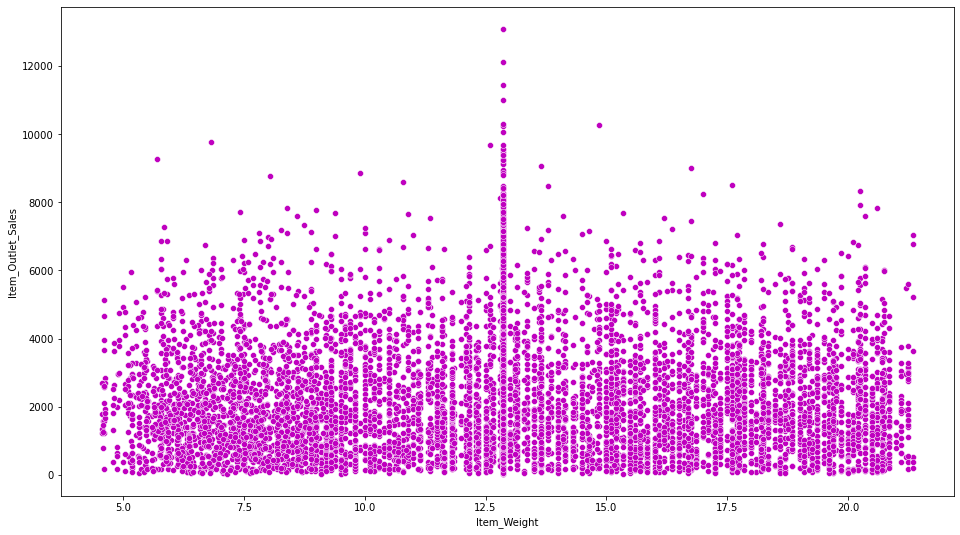

In [24]:
# relation between Item weight and Item outlet sale
plt.figure(figsize=(16,9))
sns.scatterplot('Item_Weight','Item_Outlet_Sales',data=training,color='m')
plt.show()

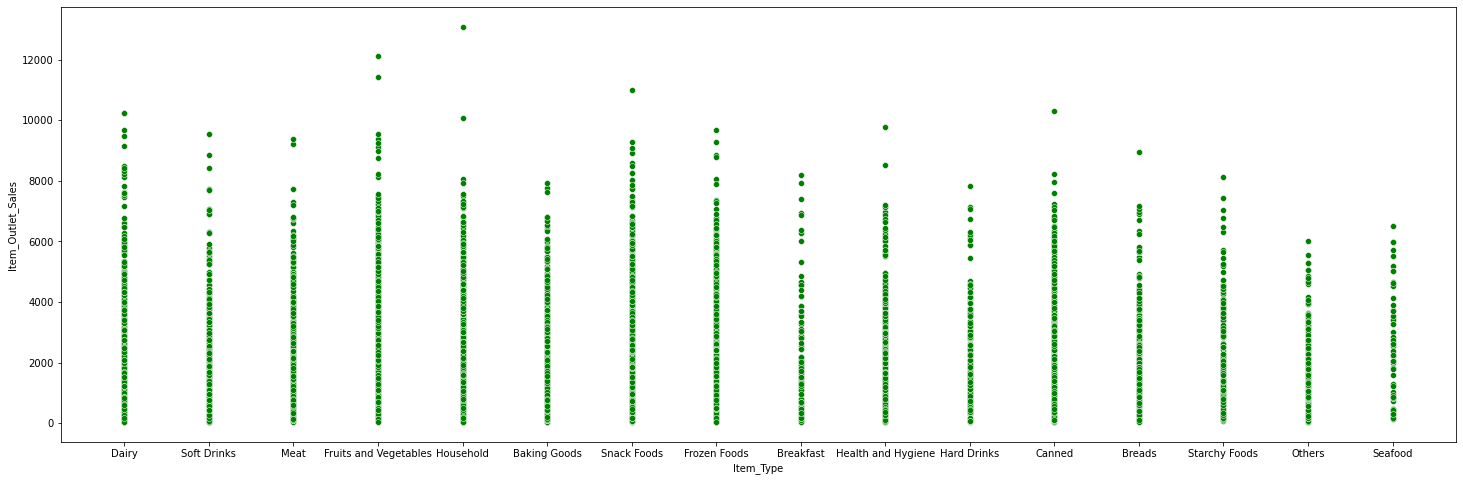

In [25]:
# relation between Item weight and Item type
plt.figure(figsize=(25,8))
sns.scatterplot('Item_Type','Item_Outlet_Sales',data=training,color='g')
plt.show()

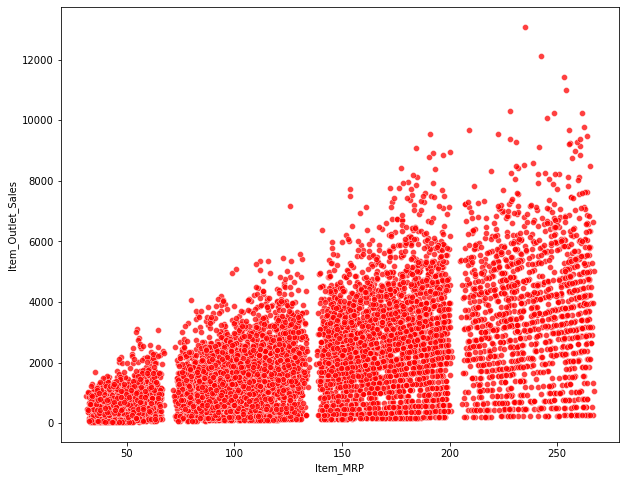

In [26]:
# relation between Item weight and Item type
plt.figure(figsize=(10,8))
sns.scatterplot('Item_MRP','Item_Outlet_Sales',data=training, alpha=0.75, color='r')
plt.show()

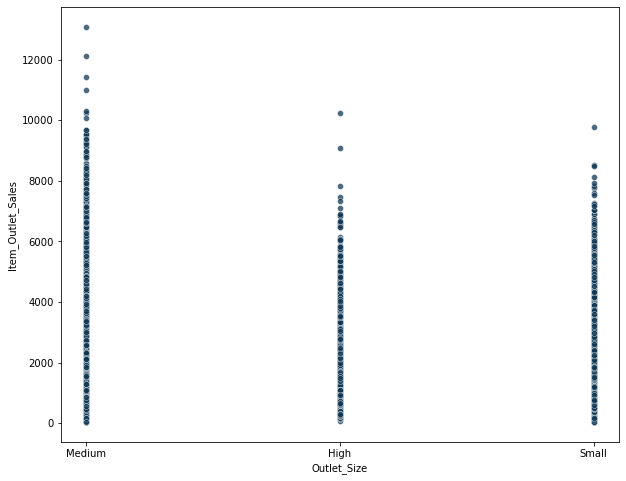

In [27]:
# relation between Item weight and Item type
plt.figure(figsize=(10,8))
sns.scatterplot('Outlet_Size','Item_Outlet_Sales',data=training, alpha=0.75, color='#0f3754')
plt.show()

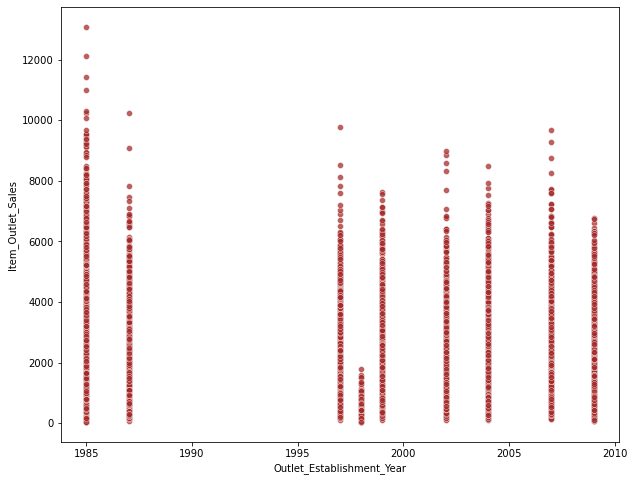

In [28]:
# relation between Item weight and Item type
plt.figure(figsize=(10,8))
sns.scatterplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=training, alpha=0.75, color='brown')
plt.show()

# 6 -- Encoding Categorical Variables

In [29]:
training['Item_Fat_Content'].replace('LF','Low Fat', inplace=True)
training['Item_Fat_Content'].replace('low fat','Low Fat', inplace=True)
training['Item_Fat_Content'].replace('reg','Regular', inplace=True)

In [30]:
training['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
# extract the catogorical columns from the dataset
training.select_dtypes(include=["object"]).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [32]:
# now encode some columns:
lab_encode=LabelEncoder()

In [33]:
# ENCODING
training['Item_Identifier']=lab_encode.fit_transform(training['Item_Identifier'])
training['Item_Fat_Content']=lab_encode.fit_transform(training['Item_Fat_Content'])
training['Item_Type']=lab_encode.fit_transform(training['Item_Type'])
training['Outlet_Identifier']=lab_encode.fit_transform(training['Outlet_Identifier'])
training['Outlet_Size']=lab_encode.fit_transform(training['Outlet_Size'])
training['Outlet_Location_Type']=lab_encode.fit_transform(training['Outlet_Location_Type'])
training['Outlet_Type']=lab_encode.fit_transform(training['Outlet_Type'])

In [34]:
x0=training

here idem identifier and outlet establish year is not important so we will drop both of these

# 7 --- Feature Scaling:

In [35]:
# separating the independent and dependent data:
x=x0.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)
y=x0['Item_Outlet_Sales']

In [36]:
scaler=StandardScaler()

In [37]:
scaled_data=scaler.fit_transform(x)
X=pd.DataFrame(scaled_data,columns=x.columns)

In [38]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,-0.738147,-0.970732,-0.766479,1.747454,1.507813,-0.284581,-1.369334,-0.252658,0.910601
1,-1.641706,1.354743,-0.908111,1.608963,-1.489023,-0.607071,-0.284581,1.091569,1.002972,-1.018440
2,1.098554,-0.738147,-0.956917,0.658786,0.010040,1.507813,-0.284581,-1.369334,-0.252658,-0.049238
3,1.500838,1.354743,-1.281758,-0.291391,0.660050,-1.664513,-0.284581,1.091569,-1.508289,-0.849103
4,-0.929428,-0.738147,-1.281758,0.421242,-1.399220,-1.312032,-1.950437,1.091569,-0.252658,-0.695373


In [39]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [40]:
# spliting the data into train and test data
xtrain, xtest, ytrain, ytest=train_test_split(X,y, test_size=0.25, random_state=123)
print("The Shape of X Data is:", X.shape, xtrain.shape, xtest.shape)
print("The Shape of y Data is:", y.shape, ytrain.shape, ytest.shape)

The Shape of X Data is: (8523, 10) (6392, 10) (2131, 10)
The Shape of y Data is: (8523,) (6392,) (2131,)


# 8 -- Model Building

# MODEL NO  1 Linear Regression

In [41]:
# creating model
lin_reg=LinearRegression()

In [42]:
# fitting the linear model
lin_reg.fit(xtrain, ytrain)
# x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=123)

LinearRegression()

In [43]:
ypred= lin_reg.predict(xtest)
ypred[0:11]

array([ 479.376 ,  657.8104,  952.094 ,  691.1004, 4537.427 ,  101.8674,
       2529.3742, 1593.9252, 1185.124 , 2093.2752, 6669.3186])

In [44]:
# measurement of model
print("R2 Score of Model is = ", r2_score(ytest, ypred))
print("Mean Squarred Error of Model is = ", mean_squared_error(ytest, ypred))
print("Root mean squared error of Model is = :", m.sqrt(mean_squared_error(ytest, ypred)))
print("Mean Absolute Error of Model is = " + str(mean_absolute_error(ytest,ypred)))

R2 Score of Model is =  1.0
Mean Squarred Error of Model is =  1.1427666531504356e-23
Root mean squared error of Model is = : 3.3804831801836194e-12
Mean Absolute Error of Model is = 2.7128928437870426e-12


# MODEL NO 2 : XTREME GRADIENT BOOSTING

In [45]:
# Creating model
xgb_model=xgb.XGBRegressor()
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
# fitting the model:
xgb_model.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [47]:
ypred= xgb_model.predict(xtest)
ypred[0:11]

array([ 481.35062,  657.7233 ,  953.5193 ,  698.1653 , 4544.7    ,
         96.45169, 2526.4658 , 1589.0975 , 1185.7229 , 2083.5867 ,
       6647.3447 ], dtype=float32)

In [48]:
# measurement of model
print("R2 Score of Model is = ", r2_score(ytest, ypred))
print("Mean Squarred Error of Model is = ", mean_squared_error(ytest, ypred))
print("Root mean squared error of Model is = :", m.sqrt(mean_squared_error(ytest, ypred)))
print("Mean Absolute Error of Model is = " + str(mean_absolute_error(ytest,ypred)))

R2 Score of Model is =  0.9999739226653295
Mean Squarred Error of Model is =  75.99962720675298
Root mean squared error of Model is = : 8.71777650589604
Mean Absolute Error of Model is = 5.4917081925390825


# MODEL NO 3 : Random forest regressor

In [49]:
# create model
rfr_model=RandomForestRegressor()

In [50]:
# fiting  the model
rfr_model.fit(xtrain, ytrain)

RandomForestRegressor()

In [51]:
y_pred= rfr_model.predict(xtest)
y_pred[0:11]

array([ 479.149628,  657.963534,  951.854312,  690.547786, 4539.371136,
        101.687634, 2529.527334, 1594.2581  , 1184.777784, 2093.621416,
       6686.442976])

In [52]:
# measurement of model
print("R2 Score of Model is = ", r2_score(ytest, y_pred))
print("Mean Squarred Error of Model is = ", mean_squared_error(ytest, y_pred))
print("Root mean squared error of Model is = :", m.sqrt(mean_squared_error(ytest, y_pred)))
print("Mean Absolute Error of Model is = " + str(mean_absolute_error(ytest,y_pred)))

R2 Score of Model is =  0.9999954859521103
Mean Squarred Error of Model is =  13.155714000158454
Root mean squared error of Model is = : 3.627080644286594
Mean Absolute Error of Model is = 1.0160589150634058


# Saving the Models

# Save Linear Regression Model

In [53]:
import pickle as pk
# Save the trained model.
saved_model = pk.dumps(lin_reg)
  
# Load the pickled model
lin_reg_model = pk.loads(saved_model)
  
# Use the loaded pickled model to make predictions

lin_reg_model.predict(xtest)

array([ 479.376 ,  657.8104,  952.094 , ...,  491.3604, 3390.2536,
       5024.1268])

# Save XGBoost Regressive Model

In [54]:
import pickle as pk
# Save the trained model.
saved_model = pk.dumps(xgb_model)
  
# Load the pickled model
xgb_model_pickle = pk.loads(saved_model)
  
# Use the loaded pickled model to make predictions

xgb_model_pickle.predict(xtest)

array([ 481.35062,  657.7233 ,  953.5193 , ...,  495.41272, 3382.9895 ,
       5027.9805 ], dtype=float32)

# Save Random Forest Regression Model

In [55]:
import pickle as pk
# Save the trained model.
saved_model = pk.dumps(rfr_model)
  
# Load the pickled model
rfr_model_pickle = pk.loads(saved_model)
  
# Use the loaded pickled model to make predictions

rfr_model_pickle.predict(xtest)

array([ 479.149628,  657.963534,  951.854312, ...,  490.980894,
       3387.703586, 5020.69793 ])

# Project Summary

The project is about to predict the sales of each object which was for sale in Big Market.
The dataset contains many of categorical columns and these columns were not understandable for the model so we convert all these features into numeric data type
so that model can understand the data and give the best result. 
Here we apply encoding technique to model for convert all the categorical features into numeric by using label encoding and one hot encoding techniques.
After that we analysis the data using different plots by seaborn and performed EDA on the data which was the necessary part of the task.
At the end I create the model which was a part of task all models performed well with best score then saved the models and finalize.
